# Euler's Method

In mathematics and computational science, the Euler method (also called forward Euler method) is a first-order numerical procedure for solving ordinary differential equations (ODEs) with a given initial value. It is the most basic explicit method for numerical integration of ordinary differential equations. It is based on the assumption that the tangent line to the integral curve(solution curve) at $(x_i, y_i)$ approximates the integral curve over the interval $[x_i,x_{i+1}]$. The Euler method is named after Leonhard Euler.

Consider the first order ODE
$$
\frac{dy}{dx} = F(x,y) \qquad y(0) = y_0
$$

To find an approximate solution at x = b, we divide the interval $[x_0,b]$ to $n$ equal parts, $b = x_0 + x_1 + \cdots + x_n$ where 
$$ x_i = x_0 + h_i \qquad  h = \frac{b - x_0}{n} $$

Since the slope of the integral curve at $(x_i, y_i)$ is $y'(x_i) = F(x_i, y_i)$, the equation of the tangent line to the integral curve at $(x_i,y_i)$ is given by


$$
y_{i+1} = y_i + hF(x_i, y_i)
$$


$$ i = 0,1,2,...,n - 1
$$

# Heun's Method

Heun's method may refer to the improved or modified Euler's method. It is named after Karl Heun and is a numerical procedure for solving ordinary differential equations (ODEs) with a given initial value.

Euler's method is used as the foundation for Heun's method. Euler's method uses the line tangent to the function at the beginning of the interval as an estimate of the slope of the function over the interval, assuming that if the step size is small, the error will be small. However, even when extremely small step sizes are used, over a large number of steps the error starts to accumulate and the estimate diverges from the actual functional value.

Heun's Method considers the tangent lines to the solution curve at both ends of the interval, one which overestimates, and one which underestimates the ideal vertical coordinates. A prediction line must be constructed based on the right end point tangent's slope alone, approximated using Euler's Method. The idea is to replace the slope of Euler's method by the average of two slopes.
 
Results of Heun's Method are more accurate than results of Euler's method

$$
\text{New slope} = \frac{F(x_n,y_n) + F(x_{n+1}, y_{n+1}^*)}{2}
$$

$$
y_{n+1}^* = y_n + hF(x_n, y_n)
$$


$$
y_{n+1} = y_n + \frac{h}{2} \left(  F(x_n,y_n) + F(x_{n+1}, y_{n+1}^*) \right) $$


## Implementation of Euler's Method

`Sage` has its own `eulers_method` function, to avoid using `Sage` built-in name, we define `forward_eulers_method` function. Inputs are initial values of $x$ and $y$, step size $h$, and value of $x$ to stop at.

In [1]:
def forward_eulers_method(f, x_initial, y_initial, h, x_wanted):
    
    number_of_iterations = int((x_wanted - x_initial) / h)
    
    x_i = x_initial
    y_i = y_initial
    
    solution = [[x_initial, y_initial]]
    
    for i in range(1, number_of_iterations + 1):
        y_i = y_i + h * f(x_i, y_i)
        x_i = x_i + h
        
        
        solution.append([x_i, y_i])
        
    return solution

## Implementation of Euler's Method

we define `heuns_method` function. Inputs are initial values of $x$ and $y$, step size $h$, and value of $x$ to stop at.


In [2]:
def heuns_method(f, x_initial, y_initial, h, x_wanted):
    
    number_of_iterations = int((x_wanted - x_initial) / h)
    
    x_i = x_initial
    y_i = y_initial
    
    solution = [[x_initial, y_initial]]
    
    for i in range(1, number_of_iterations + 1):
        y_i = y_i + 0.5 * h * (f(x_i, y_i) + f((x_i + h), (y_i + h * f(x_i, y_i))))
        x_i = x_i + h
        
        
        solution.append([x_i, y_i])
        
    return solution

## Test with an example 1

Find the value of $y$ at $x = 1.5$ given that $y(0) = 1$. Use Euler's method and Heun's Method with a step size of 0.1

$$
\frac{dy}{dx} = xy
$$

In [3]:
var('x y')

f(x, y) = x * y

solution_euler = forward_eulers_method(f, x_initial = 0, y_initial = 1, h = 0.1, x_wanted = 1.5)

solution_heun = heuns_method(f, x_initial = 0, y_initial = 1, h = 0.1, x_wanted = 1.5)

print("Euler's method solution")

show(table(solution_euler, header_row = ['$x_i$', '$y_i$']))

print("Heun's method solution")

show(table(solution_heun, header_row = ['$x_i$', '$y_i$']))

Euler's method solution


,
,
,
,
,
,
,
,
,
,
,


Heun's method solution


,
,
,
,
,
,
,
,
,
,
,


Solution with `Sage` built in `eulers_method` function

In [4]:
eulers_method(f, 0, 1, 0.1, 1.5)

         x                    y                  h*f(x,y)
         0                    1                    0
0.100000000000000                    1   0.0100000000000000
0.200000000000000     1.01000000000000   0.0202000000000000
0.300000000000000     1.03020000000000   0.0309060000000000
0.400000000000000     1.06110600000000   0.0424442400000000
0.500000000000000     1.10355024000000   0.0551775120000000
0.600000000000000     1.15872775200000   0.0695236651200000
0.700000000000000     1.22825141712000   0.0859775991984000
0.800000000000000     1.31422901631840    0.105138321305472
0.900000000000000     1.41936733762387    0.127743060386148
1.00000000000000     1.54711039801002    0.154711039801002
1.10000000000000     1.70182143781102    0.187200358159212
1.20000000000000     1.88902179597024    0.226682615516428
1.30000000000000     2.11570441148666    0.275041573493266
1.40000000000000     2.39074598497993    0.334704437897190
1.50000000000000     2.72545042287712    0.40881756343

As seen, our solution and `Sage` solution are identical.

Plot exact solution vs. Euler's solution and Heun's solution,. As seen, Heun's method solution is very close to the exact solution.

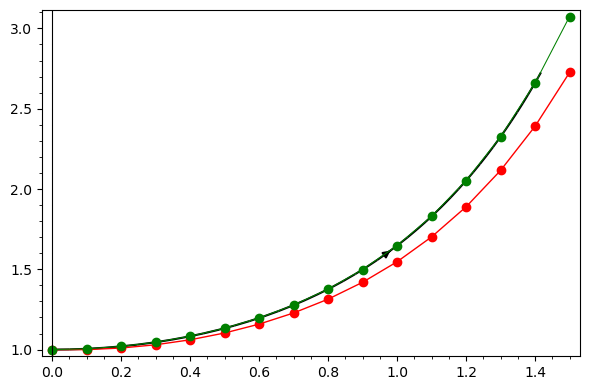

In [5]:
p1 = streamline_plot(f(x, y), (x, 0, 1.5), (y, 1, 2.726), start_points = [[0, 1]], color = 'black')

p2 = line2d(solution_euler, color = 'red' , marker = 'o')

p3 = line2d(solution_heun, color = 'green' , marker = 'o', thickness = 0.75)

p1 + p2 + p3

## Test with an example 2

Use Euler's method and Heun's method to find the value of $y$ over the interval $t = 0$ to $1$ with a step size of $0.1$ given that $y(0) = 1$

$$
\frac{dy}{dt} = yt^3 - 1.5y
$$

In [6]:
var('t y')

f2(t, y) = y * t^3 - 1.5 * y 

solution_2_euler = forward_eulers_method(f2, x_initial = 0, y_initial = 1, h = 0.1, x_wanted = 1)

solution_2_heun = heuns_method(f2, x_initial = 0, y_initial = 1, h = 0.1, x_wanted = 1)

print("Euler's method solution")

show(table(solution_2_euler, header_row = ['$x_i$', '$y_i$']))

print("Heun's method solution")

show(table(solution_2_heun, header_row = ['$x_i$', '$y_i$']))

Euler's method solution


,
,
,
,
,
,
,
,
,
,
,


Heun's method solution


,
,
,
,
,
,
,
,
,
,
,


Solution with `Sage` built in `eulers_method` function

In [7]:
eulers_method(f2, 0, 1, 0.1, 1)

         x                    y                  h*f(x,y)
         0                    1   -0.150000000000000
0.100000000000000    0.850000000000000   -0.127415000000000
0.200000000000000    0.722585000000000   -0.107809682000000
0.300000000000000    0.614775318000000  -0.0905564043414000
0.400000000000000    0.524218913658600  -0.0752778360013750
0.500000000000000    0.448941077657225  -0.0617293981778684
0.600000000000000    0.387211679479357  -0.0497179796451494
0.700000000000000    0.337493699834207  -0.0390480210708178
0.800000000000000    0.298445678763389  -0.0294864330618229
0.900000000000000    0.268959245701567  -0.0207367578435908
1.00000000000000    0.248222487857976  -0.0124111243928988


As seen, our solution and `Sage` solution are identical.

Plot exact solution vs. Euler's solution and Heun's solution. As seen, Heun's method solution is very close to the exact solution.

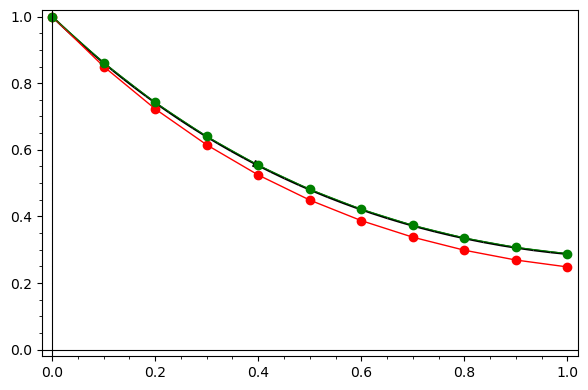

In [8]:
p1 = streamline_plot(f2(t, y), (t, 0, 1), (y, 0, 1), start_points = [[0, 1]], color = 'black')

p2 = line2d(solution_2_euler, color = 'red' , marker = 'o')

p3 = line2d(solution_2_heun, color = 'green' , marker = 'o', thickness = 0.7)

p1 + p2 + p3